In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV into DataFrame
df = pd.read_csv('eda_outputs.csv')

df.head()

,file_name,class_id,class_name,pred_class_id,pred_class_name,window_size,confidence,is_pred_correct,position
0,rIewS2RaZCc.mp4,176,kissing,176,kissing,5,0.068962,True,S
1,rIewS2RaZCc.mp4,176,kissing,169,juggling balls,5,0.009940,False,M
2,rIewS2RaZCc.mp4,176,kissing,176,kissing,5,0.999999,True,E
3,rIewS2RaZCc.mp4,176,kissing,176,kissing,7,0.287095,True,S
4,rIewS2RaZCc.mp4,176,kissing,36,brushing hair,7,0.080067,False,M


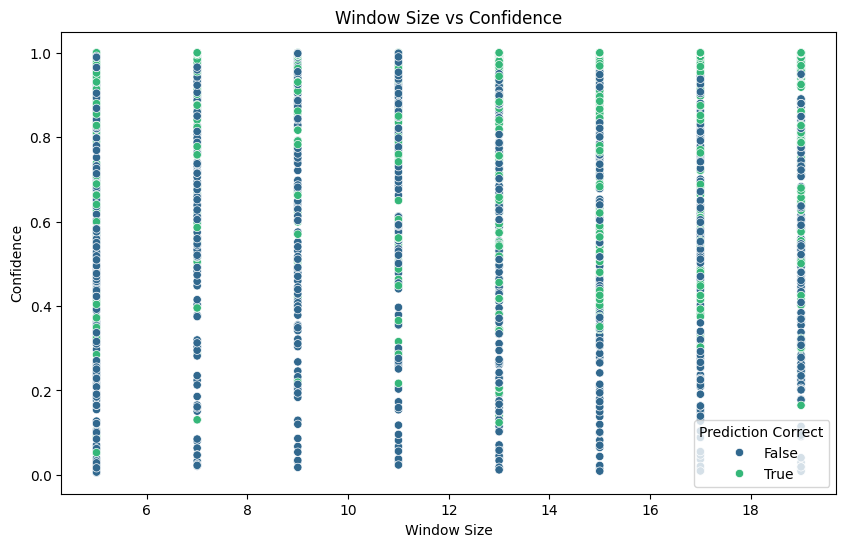

In [6]:
# Plot 1: Scatter plot of window size vs confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='window_size', y='confidence', data=df, hue='is_pred_correct', palette='viridis')
plt.title('Window Size vs Confidence')
plt.xlabel('Window Size')
plt.ylabel('Confidence')
plt.legend(title='Prediction Correct')
plt.show()

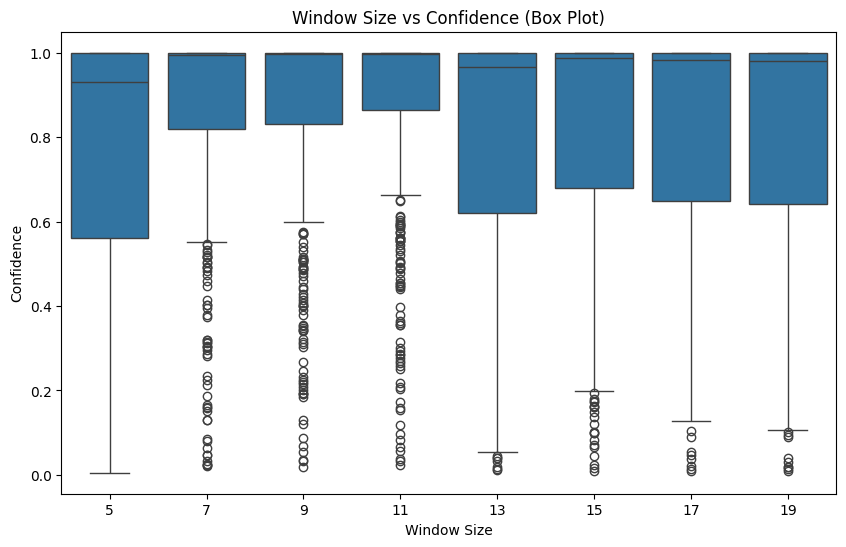

In [7]:
# Plot 2: Box plot of window size vs confidence
plt.figure(figsize=(10, 6))
sns.boxplot(x='window_size', y='confidence', data=df)
plt.title('Window Size vs Confidence (Box Plot)')
plt.xlabel('Window Size')
plt.ylabel('Confidence')
plt.show()

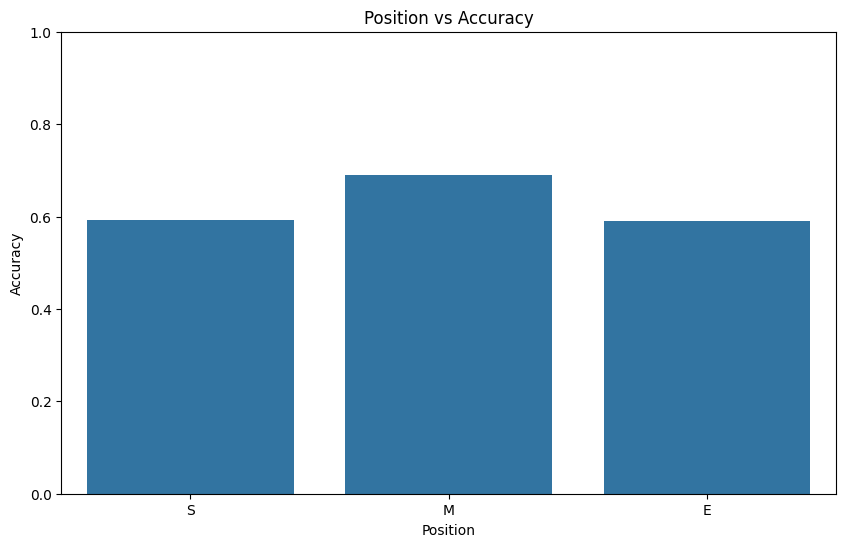

In [8]:
# Plot 3: Bar plot of position vs accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='position', y='is_pred_correct', data=df, errorbar=None)
plt.title('Position vs Accuracy')
plt.xlabel('Position')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to represent accuracy as a proportion (0 to 1)
plt.show()

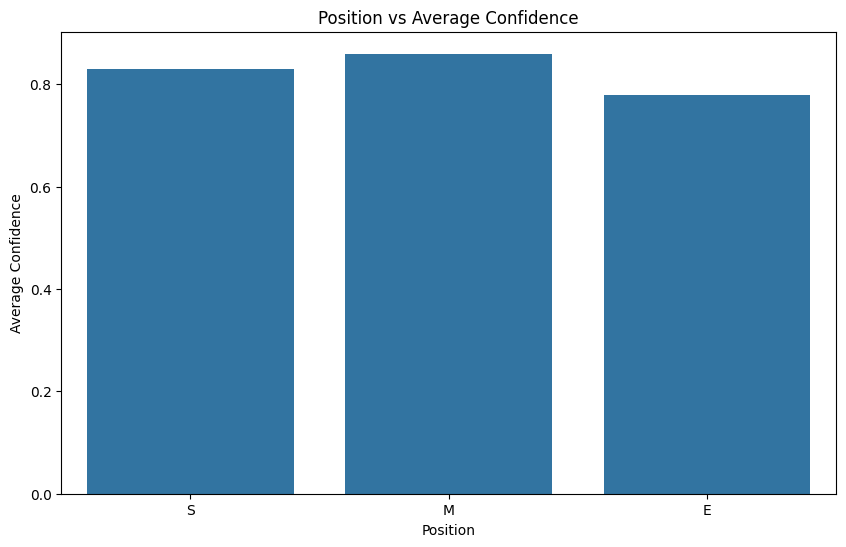

In [9]:
# Plot 4: Bar plot of position vs average confidence
plt.figure(figsize=(10, 6))
sns.barplot(x='position', y='confidence', data=df, errorbar=None)
plt.title('Position vs Average Confidence')
plt.xlabel('Position')
plt.ylabel('Average Confidence')
plt.show()

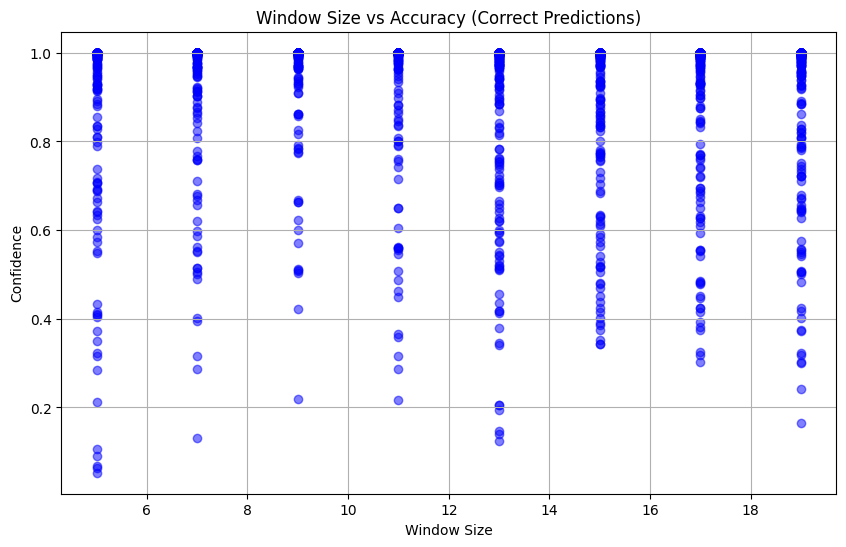

In [10]:
# Filter correct predictions
correct_predictions_df = df[df['is_pred_correct'] == 1]

# Plot window size vs accuracy
plt.figure(figsize=(10, 6))
plt.scatter(correct_predictions_df['window_size'], correct_predictions_df['confidence'], color='blue', alpha=0.5)
plt.title('Window Size vs Accuracy (Correct Predictions)')
plt.xlabel('Window Size')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

In [21]:
print(df["confidence"].mean())

print(correct_predictions_df["confidence"].mean())

0.8228062326605555
0.9325966274219654


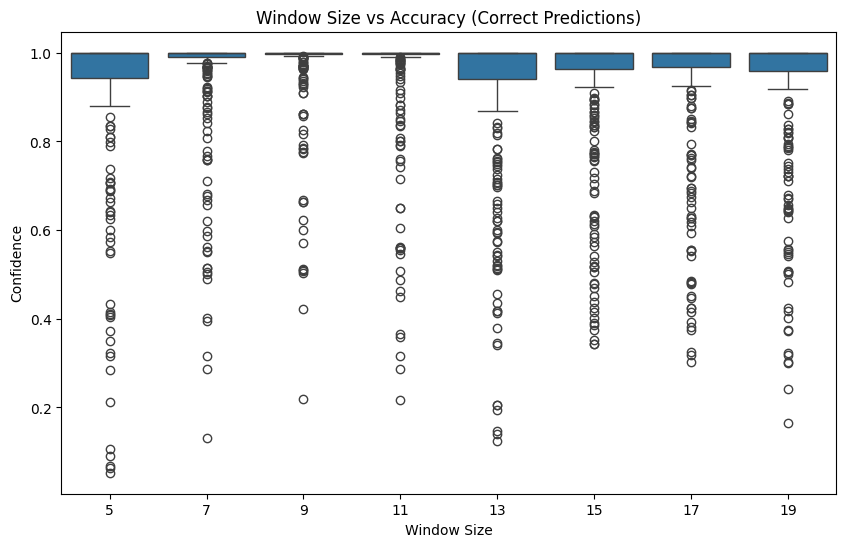

In [13]:
# Create box plot of window size vs confidence
plt.figure(figsize=(10, 6))
sns.boxplot(x='window_size', y='confidence', data=correct_predictions_df)
plt.title('Window Size vs Accuracy (Correct Predictions)')
plt.xlabel('Window Size')
plt.ylabel('Confidence')
plt.show()


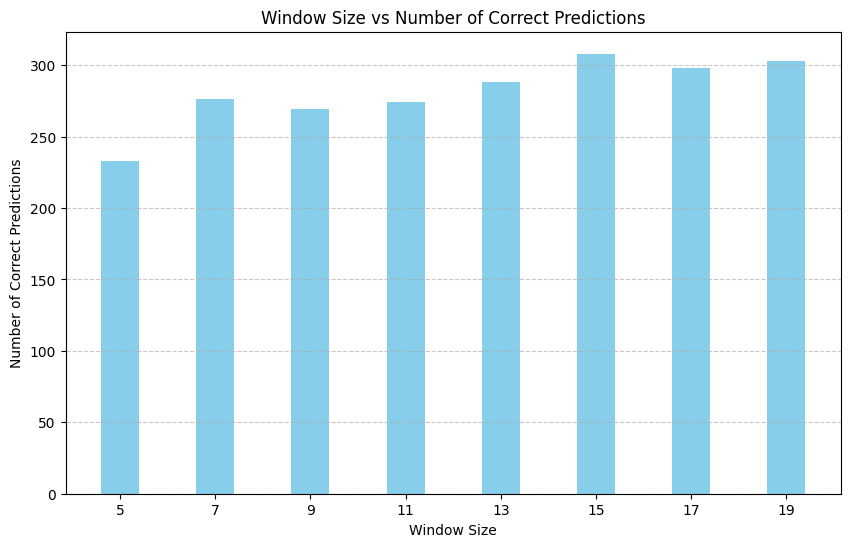

In [17]:
# Count the number of correct predictions for each window size
correct_predictions_counts = correct_predictions_df.groupby('window_size').size().reset_index(name='count')

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(correct_predictions_counts['window_size'], correct_predictions_counts['count'], color='skyblue')
plt.title('Window Size vs Number of Correct Predictions')
plt.xlabel('Window Size')
plt.ylabel('Number of Correct Predictions')
plt.xticks(correct_predictions_counts['window_size'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

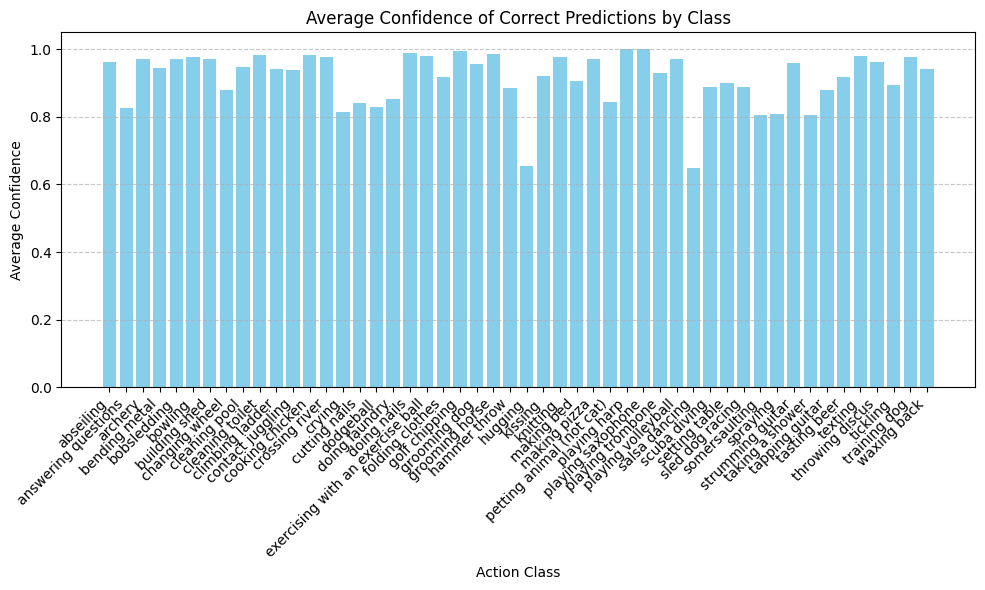

In [11]:
# Calculate average confidence for each class
average_confidence_by_class = correct_predictions_df.groupby('class_name')['confidence'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_confidence_by_class['class_name'], average_confidence_by_class['confidence'], color='skyblue')
plt.title('Average Confidence of Correct Predictions by Class')
plt.xlabel('Action Class')
plt.ylabel('Average Confidence')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
df_ss = pd.read_csv('sampling_strategies.csv')

df_ss.head(10)

#set(df_ss['class_name'])
#set(df_ss[df_ss['class_name'] == 'carving pumpkin']['file_name'])

,file_name,class_id,class_name,pred_class_id,pred_class_name,window_size,confidence,is_pred_correct,time_interval,sampling_strategy
0,mb2rno2ylUU.mp4,28,bobsledding,64,cleaning toilet,5,0.085564,False,0,Random
1,mb2rno2ylUU.mp4,28,bobsledding,28,bobsledding,5,0.183366,True,40,Random
2,mb2rno2ylUU.mp4,28,bobsledding,28,bobsledding,5,1.000000,True,80,Random
3,mb2rno2ylUU.mp4,28,bobsledding,28,bobsledding,5,1.000000,True,120,Random
4,mb2rno2ylUU.mp4,28,bobsledding,28,bobsledding,5,1.000000,True,160,Random
5,mb2rno2ylUU.mp4,28,bobsledding,28,bobsledding,5,1.000000,True,200,Random
6,mb2rno2ylUU.mp4,28,bobsledding,28,bobsledding,5,1.000000,True,240,Random
7,mb2rno2ylUU.mp4,28,bobsledding,28,bobsledding,5,0.553856,True,0,MostRecent
8,mb2rno2ylUU.mp4,28,bobsledding,28,bobsledding,5,0.999978,True,40,MostRecent
9,mb2rno2ylUU.mp4,28,bobsledding,28,bobsledding,5,1.000000,True,80,MostRecent


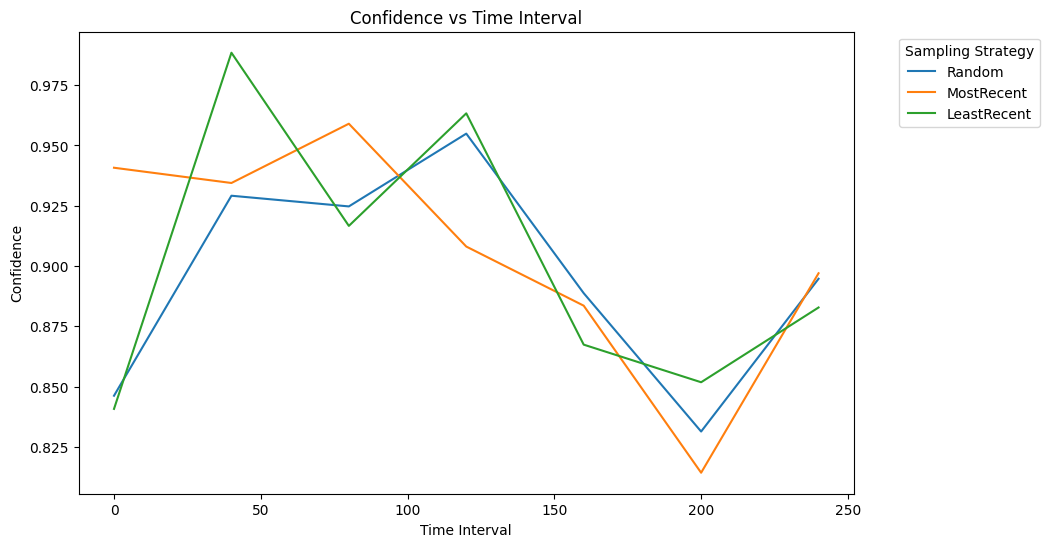

In [79]:
# Filter the DataFrame based on the specified class_name
specified_class_name = 'bobsledding'
filtered_df = df_ss[df_ss['class_name'] == specified_class_name]

# Create separate line plots for each sampling strategy
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ss, x='time_interval', y='confidence', hue='sampling_strategy', markers=True, dashes=False, errorbar=None)

# Set title and labels
plt.title(f'Confidence vs Time Interval')
plt.xlabel('Time Interval')
plt.ylabel('Confidence')

# Show legend
plt.legend(title='Sampling Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

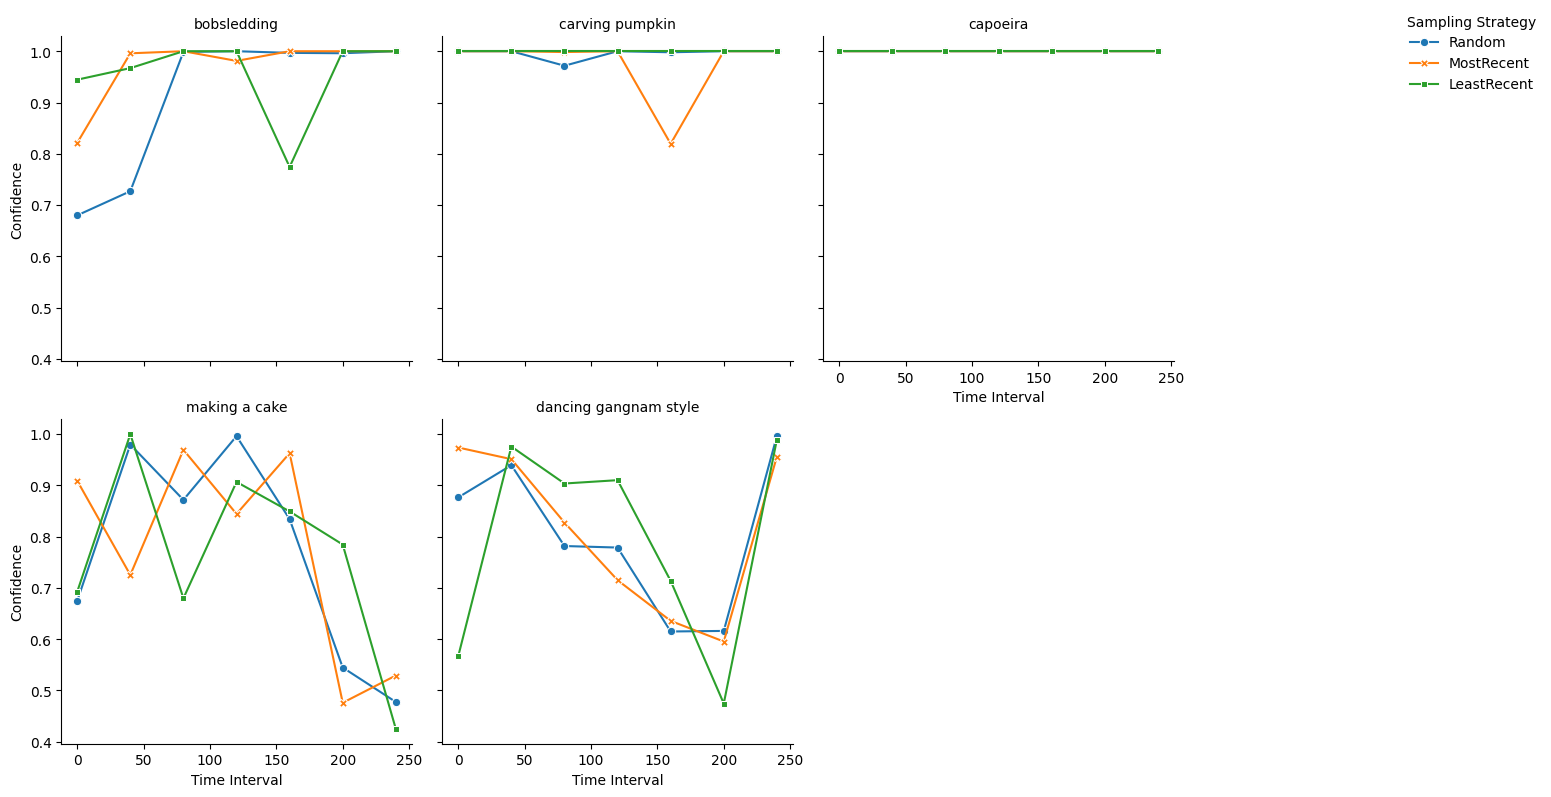

In [70]:
# Create separate line plots for each sampling strategy
g = sns.FacetGrid(df_ss, col='class_name', col_wrap=3, height=4)
g.map_dataframe(sns.lineplot, x='time_interval', y='confidence', hue='sampling_strategy', style='sampling_strategy', markers=True, dashes=False, errorbar=None)
g.set_axis_labels('Time Interval', 'Confidence')
g.set_titles('{col_name}')

# Add legend outside the plot
g.add_legend(title='Sampling Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

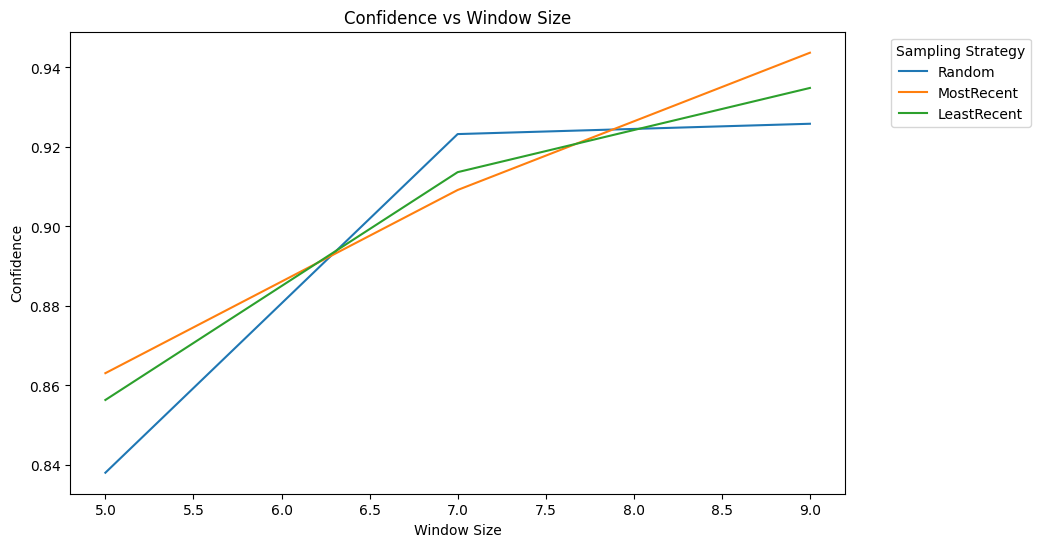

In [78]:
# Create separate line plots for each sampling strategy
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ss, x='window_size', y='confidence', hue='sampling_strategy', markers=True, dashes=False, errorbar=None)

# Set title and labels
plt.title(f'Confidence vs Window Size')
plt.xlabel('Window Size')
plt.ylabel('Confidence')

# Show legend
plt.legend(title='Sampling Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

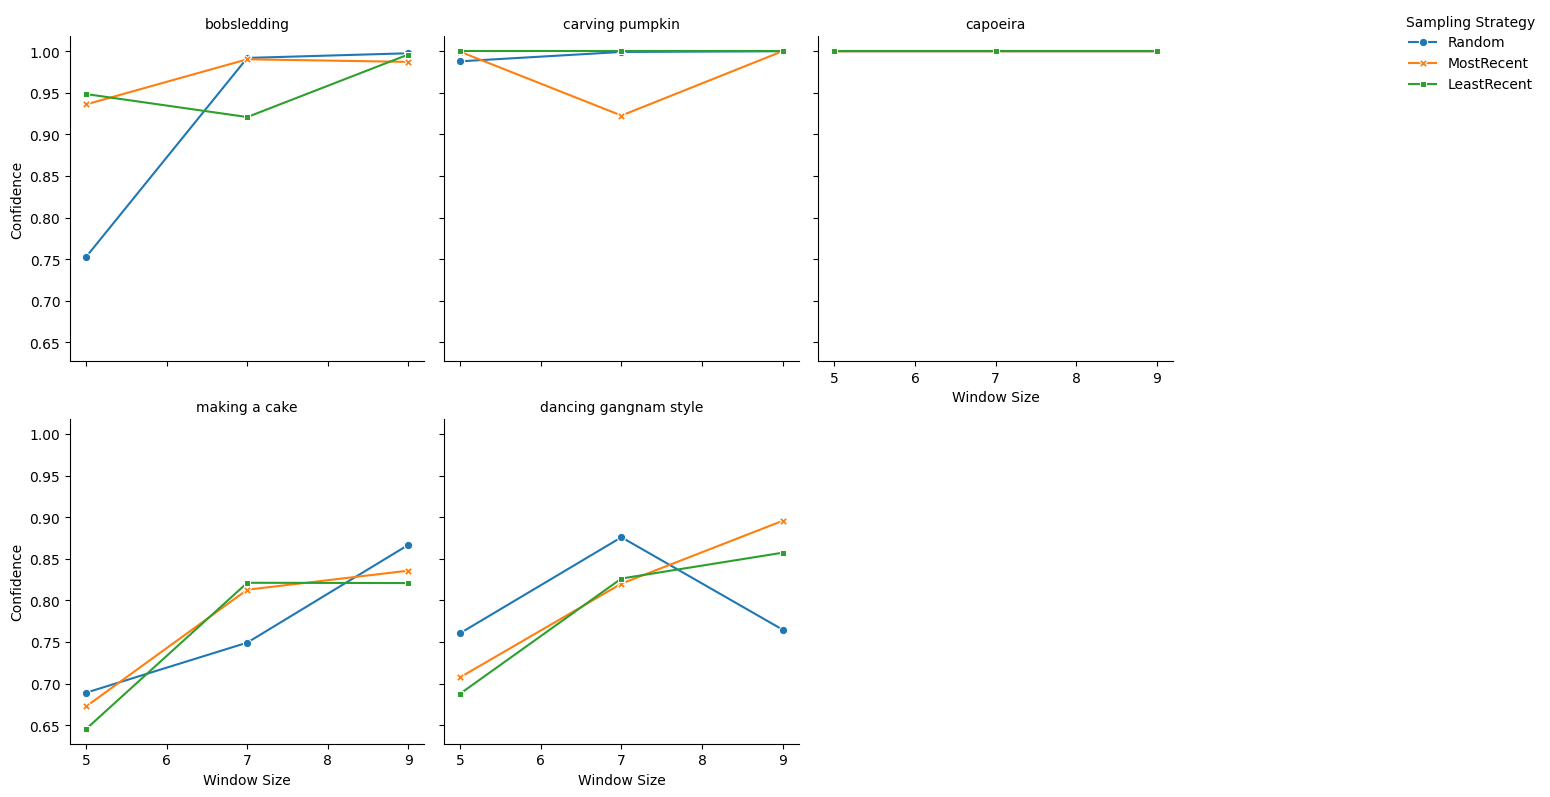

In [72]:
# Create separate line plots for each sampling strategy
g = sns.FacetGrid(df_ss, col='class_name', col_wrap=3, height=4)
g.map_dataframe(sns.lineplot, x='window_size', y='confidence', hue='sampling_strategy', style='sampling_strategy', markers=True, dashes=False, errorbar=None)
g.set_axis_labels('Window Size', 'Confidence')
g.set_titles('{col_name}')

# Add legend outside the plot
g.add_legend(title='Sampling Strategy', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()